# 16.410 Principles of Autonomy Recitation 1

This is an optional **ungraded** python refresher! All of the grading in this notebook, and subsequent submission are *optional* and *is not part of the final grade*. The only purpose of the "grading" in this notebook (and on Gradescope) is to introduce students to the format and submission procedure the homeworks will use.

In [2]:
from principles_of_autonomy.grader import Grader
from principles_of_autonomy.notebook_tests.recitation_1 import TestRecitation1

# Functions and Loops

Write a function called `square_values` that takes in a list of numbers and returns a list of their squares. This function should use a `for` loop.

*The function signature should be `square_values(input_list: list[int]) -> list[int]`*

In [2]:
def square_values(input_list: list[int]) -> list[int]:
    raise NotImplementedError()

In [3]:
# Try it out! 
input_list = [1,2,3,4]
output_list = square_values(input_list)
print(f"Produced output list {output_list} from input list {input_list}")

Produced output list [1, 4, 9, 16] from input list [1, 2, 3, 4]


In [4]:
# Make sure it passes the test! 
Grader.run_single_test_inline(TestRecitation1, "test_1_check_square_function", locals())

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


# Numpy for vectorized operations

Looping through large lists can be slow. How long does it take our function to work on a large list?

In [5]:
large_input = range(10000)
%timeit square_values(large_input)

2.3 ms ± 23.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Dang, that's slow.

[NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html) is an important package for scientific computing in Python, and gives us access to multi-dimensional arrays and operations on these arrays. Often these operations are ``vectorized'', meaning the computer's CPU can apply the same operation to many items in the array at once. Let's see how NumPy can be used, and then use it to rewrite our `square_values` function.

In [6]:
# import NumPy
import numpy as np

# create an array
a_regular_old_list = [5,6,7,8]
demo_array = np.asarray(a_regular_old_list)
another_np_array = np.arange(0,4)
print("starting with input lists: ")
print(f"\t demo_array: {demo_array}")
print(f"\t another_np_array: {another_np_array}")

# add something to the list 
print(f"adding 5 to demo_array produces {demo_array + 5}")
print(f"dividing demo_array by 3 produces {demo_array / 5}")
print(f"adding the arrays together produces {demo_array + another_np_array}")

starting with input lists: 
	 demo_array: [5 6 7 8]
	 another_np_array: [0 1 2 3]
adding 5 to demo_array produces [10 11 12 13]
dividing demo_array by 3 produces [1.  1.2 1.4 1.6]
adding the arrays together produces [ 5  7  9 11]


Now that we've been introduced to NumPy, create a new function `fast_square_values`, that uses NumPy (and no loops) to square all of the values passed to it.

In [7]:
def fast_square_values(input_list: np.ndarray) -> np.ndarray:
    raise NotImplementedError()

In [8]:
Grader.run_single_test_inline(TestRecitation1, "test_2_check_fast_square_function", locals())

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [9]:
# How does it compare to our old function? This may take a second to run
large_np_input = np.arange(0,10000)
%timeit square_values(large_np_input)
%timeit fast_square_values(large_np_input)

1.27 ms ± 166 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.78 μs ± 39.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Class Basics

Classes collect attributes and functions related to a given object. Complete the ``Robot`` class below.

In [10]:
class Robot:
    # this function initalizes the class
    def __init__(self, name: str, is_rational: bool, position: int = 0):
        self.name = name
        # assign the robot's is_rational and position property
        raise NotImplementedError()

    def move_left(self)->None:
        """
        This function should move the robot left (subtract 1 from its current position)
        if the robot is rational. If the robot is not, it should add one (moving to the right)
        """
        raise NotImplementedError()

    def move_right(self)->None:
        """
        This function should do the oppisite of `move_left`
        """
        raise NotImplementedError()

    def reset(self)->None:
        """
        This function resets the robot's position to 0
        """
        raise NotImplementedError()

    def get_position(self)->int:
        """
        This function returns the robot's current position
        """
        raise NotImplementedError()
    
    def print_position(self):
        print(f"{self.name}'s position is {self.get_position()}")

In [11]:
# Create a robot
robot = Robot("wall-eeee", False)
# move "right" (position should now be -1
robot.move_right()
robot.print_position()

wall-eeee's position is -1


In [12]:
Grader.run_single_test_inline(TestRecitation1, "test_3_robot_class", locals())

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


# Plotting wall-eee's random walk

Often, we need to visualize things. [Matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py) is a common tool to reach for for this task. Let's use it to plot wall-eee's random walk (to the store, or some other destination).

In [13]:
# First, we need `randomness`

a_random_number = np.random.rand()
print(f"Your lucky floating point number is {a_random_number}")

Your lucky floating point number is 0.33111698391284927


In [14]:
def create_random_walk(robot: Robot, probability_left: float, max_iterations: int = 500):
    """
    Perform a random walk of `max_iterations` time steps. At each time step, with `probability_left`, the robot calls "move_left()".
    Record the robot's position and times, and return them.
    """
    # make sure these two arrays are the same length
    times = [] # fill with time values (0,1,....,max_iterations
    positions = [] # fill with robot positions after each step

    raise NotImplementedError()

    assert len(times) == len(positions)
    return times, positions

In [15]:
times, positions = create_random_walk(robot, 0.5)

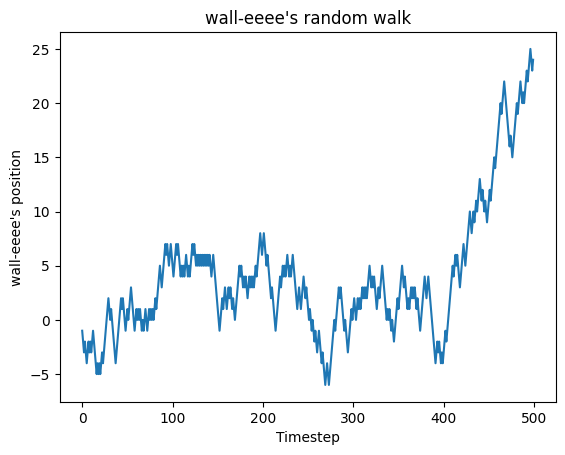

In [16]:
# plot the random walk
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(times,positions)
ax.set_xlabel("Timestep")
ax.set_ylabel(f"{robot.name}'s position")
ax.set_title(f"{robot.name}'s random walk")
plt.show()

In [17]:
# Run all tests
Grader.grade_output([TestRecitation1], [locals()], "results.json")
Grader.print_test_results("results.json")

Total score is 15/15.

Score for test_1_check_square_function (principles_of_autonomy.notebook_tests.recitation_1.TestRecitation1) is 5/5.

Score for test_2_check_fast_square_function (principles_of_autonomy.notebook_tests.recitation_1.TestRecitation1) is 5/5.

Score for test_3_robot_class (principles_of_autonomy.notebook_tests.recitation_1.TestRecitation1) is 5/5.
